<img src='pics/otus.png'>

# KNN, подбор параметров модели

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8]



## KNN в задаче классификации

In [3]:
X, y = datasets.make_blobs(n_samples=100, random_state=4, centers=2, cluster_std=2)
X[:5], y[:5]

(array([[13.78731721,  1.73323541],
        [10.68075246,  3.87600675],
        [ 8.09139034,  0.36429043],
        [10.80129018,  6.34922981],
        [ 8.78819007,  2.53766878]]), array([0, 1, 1, 1, 0]))

In [4]:
def get_class_colour(class_label):
    return 'green' if class_label else 'blue'

In [5]:
def plot_points(X, y, new_points=None, new_prediction=None, nearest_points=None, file_name=None):
    plt.scatter(X[:, 0], X[:, 1], c=[get_class_colour(y_i) for y_i in y], s=100, edgecolor='black', alpha=0.3)
    
    if new_points is not None:
        plt.scatter(new_points[:, 0], new_points[:, 1], c='black', s=100, edgecolor='black')
    
    if new_prediction is not None:
        plt.scatter(new_points[:, 0], new_points[:, 1], c=[get_class_colour(y_i) for y_i in new_prediction], s=100, edgecolor='black')
        
    if nearest_points is not None:
        plt.scatter(nearest_points[:, 0], nearest_points[:, 1], c='red', s=100, edgecolor='black')
    
    plt.title("Classification problem \n What is the color for the new (x1, x2) pair?")
    plt.xlabel("x1 (feature)")
    plt.ylabel("x2 (feature)")
    plt.gca().set_aspect('equal', adjustable='box')
    
    if file_name:
        plt.savefig(filename)

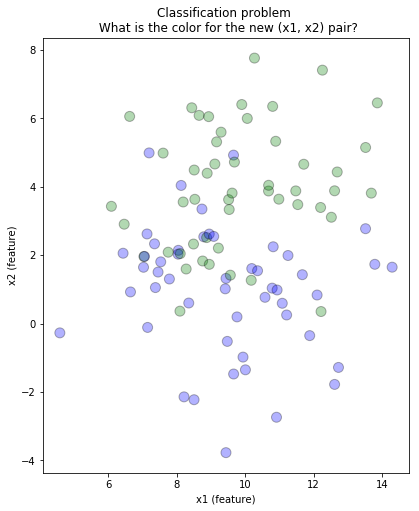

In [6]:
plot_points(X, y)

In [7]:
X_new = np.array([[12, 6]])

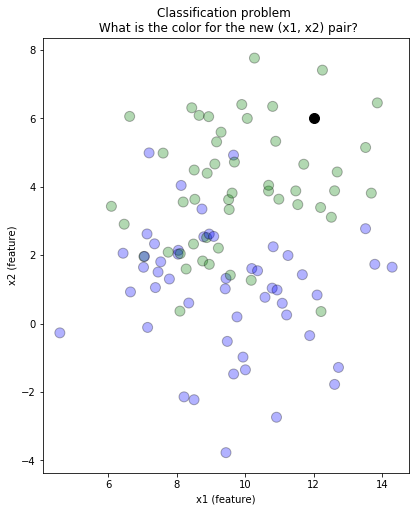

In [8]:
plot_points(X, y, new_points=X_new)

In [11]:
from scipy.spatial.distance import euclidean

def find_nearest_point_index(x_new, X):
    d_min = euclidean(x_new, X[0])
    min_idx = 0
    for idx in range(1, X.shape[0]):
        d = euclidean(x_new, X[idx])
        if d < d_min:
            d_min = d
            min_idx = idx
    return min_idx


min_idx = find_nearest_point_index(X_new, X)

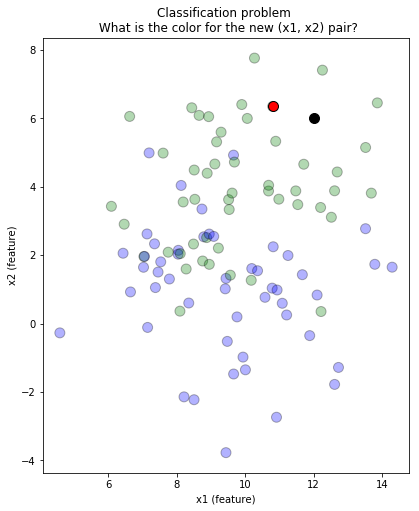

In [12]:
plot_points(X, y, new_points=X_new, nearest_points=X[[min_idx]])

In [13]:
def predict_class(x_new, X, y):
    min_idx = find_nearest_point_index(x_new, X)
    return y[min_idx]

y_new = predict_class(X_new, X, y)

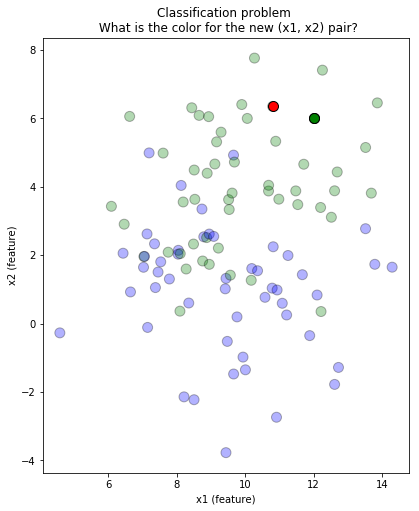

In [14]:
plot_points(X, y, new_points=X_new, new_prediction=[y_new], nearest_points=X[[min_idx]])

In [15]:
X_new = np.array([[12, -2]])
min_idx = find_nearest_point_index(X_new, X)
y_new = predict_class(X_new, X, y)

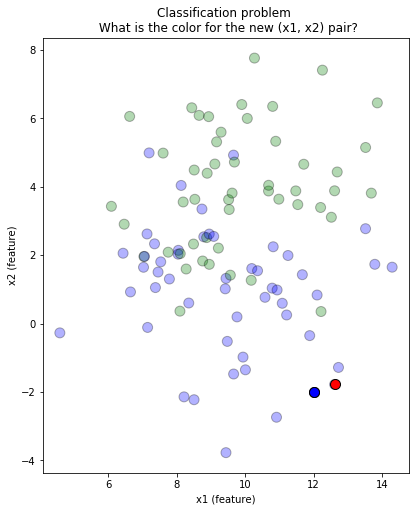

In [16]:
plot_points(X, y, new_points=X_new, new_prediction=[y_new], nearest_points=X[[min_idx]])

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X_new)

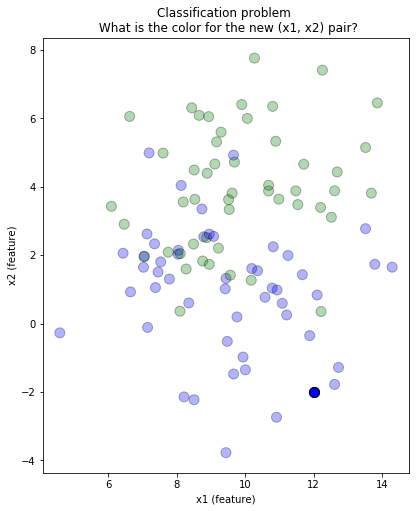

In [18]:
plot_points(X, y, new_points=X_new, new_prediction=[y_pred])

In [19]:
X_new = np.c_[np.random.randint(5, 15, 10), np.random.randint(-2, 8, 10)]

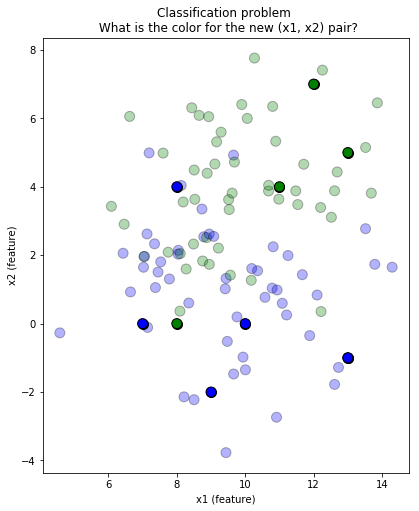

In [20]:
plot_points(X, y, new_points=X_new, new_prediction=knn.predict(X_new))

In [21]:
from scipy.spatial.distance import cdist
from collections import Counter

def predict_class(x_new, X, y, k=1):

    dist = cdist(x_new, X)
    nearest_y = y[np.argpartition(dist, k, axis=1)[:, :k]]
    return np.array([Counter(row).most_common(1)[0][0] for row in nearest_y])


In [22]:
y_pred = predict_class(X_new, X, y, k=3)

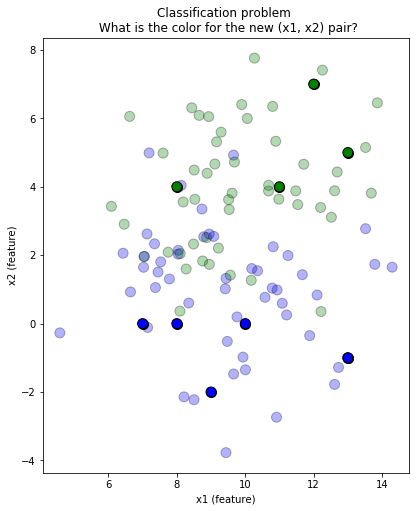

In [23]:
plot_points(X, y, new_points=X_new, new_prediction=y_pred)

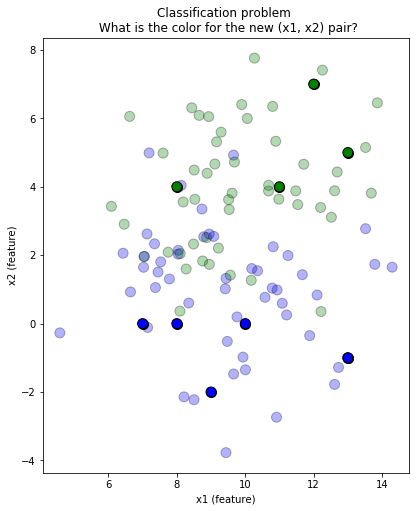

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
y_pred = knn.predict(X_new)
plot_points(X, y, new_points=X_new, new_prediction=y_pred)

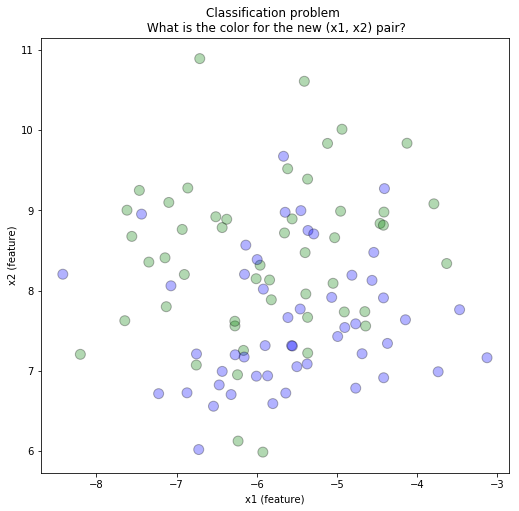

In [25]:
X, y = datasets.make_blobs(n_samples=100, random_state=5, centers=2)
X[:5], y[:5]
plot_points(X, y)

In [26]:

h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
x_pred = np.c_[xx.ravel(), yy.ravel()]


In [27]:
def plot_knn_classifier(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    Z = knn.predict(x_pred)
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(12, 8))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()


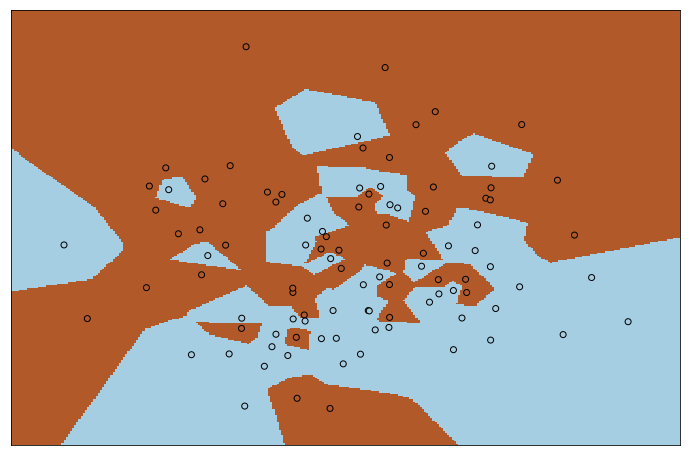

In [28]:
plot_knn_classifier(1)

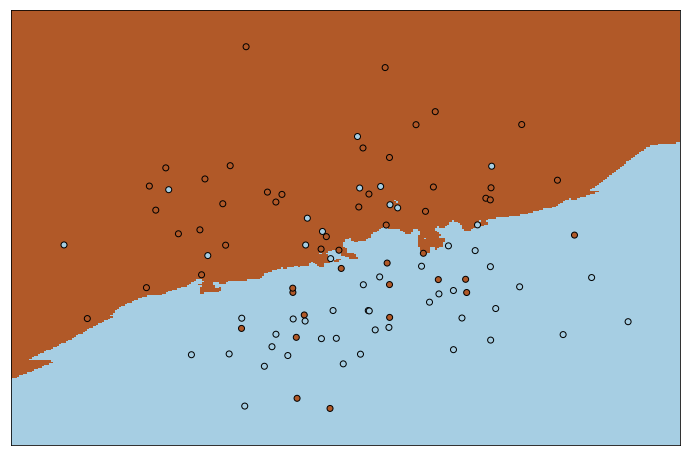

In [29]:
plot_knn_classifier(30)

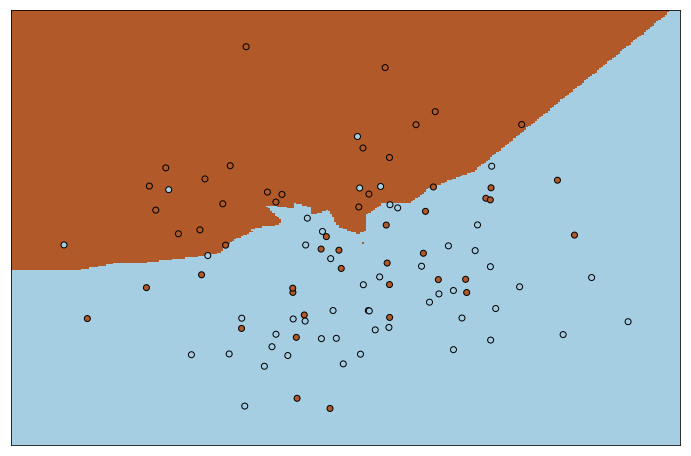

In [30]:
plot_knn_classifier(90)

## Нормализация в knn

In [31]:
X, y = datasets.make_blobs(n_samples=100, random_state=4, centers=2, cluster_std=2)
X[:, 1] *= 1000000000
X[:5], y[:5]

(array([[1.37873172e+01, 1.73323541e+09],
        [1.06807525e+01, 3.87600675e+09],
        [8.09139034e+00, 3.64290431e+08],
        [1.08012902e+01, 6.34922981e+09],
        [8.78819007e+00, 2.53766878e+09]]), array([0, 1, 1, 1, 0]))

In [32]:
def plot_points_scaled(X, y, new_points=None, new_prediction=None, nearest_points=None, file_name=None):
    plt.scatter(X[:, 0], X[:, 1], c=[get_class_colour(y_i) for y_i in y], s=100, edgecolor='black', alpha=0.3)
    plt.figure(1, figsize=(12, 8))
    plt.title("Classification problem \n What is the color for the new (x1, x2) pair?")
    plt.xlabel("x1 (feature)")
    plt.ylabel("x2 (feature)")
    plt.gca().set_aspect('equal', adjustable='datalim')
    if file_name:
        plt.savefig(filename)

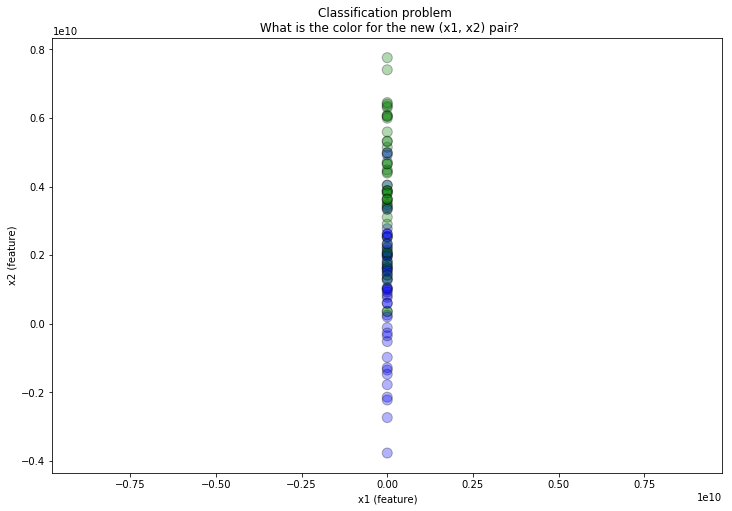

In [33]:
plot_points_scaled(X, y)

In [35]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
accuracy_score(y_pred, y)

0.81

In [36]:
from sklearn.preprocessing import MinMaxScaler
knn = KNeighborsClassifier(n_neighbors=5)
X_scaled = MinMaxScaler().fit_transform(X)
knn.fit(X_scaled, y)
y_pred = knn.predict(X_scaled)
accuracy_score(y_pred, y)

0.87

### Другой пример 

<img src="pics/knn_cls.png">
<img src="pics/knn_cls_1.png">

## KNN в задаче регрессии

In [37]:
X = 10 * np.random.rand(100, 1).reshape(-1, 1)
y = X + np.random.randn(100, 1)

In [38]:
def plot_points_regression(X, y, new_points=None, new_prediction=None, nearest_points=None, file_name=None):
    plt.scatter(X[:, 0], y, c='blue', s=100, edgecolor='black', alpha=0.3)
    
    if new_points is not None:
        plt.scatter(new_points, new_prediction, c='green', s=100, edgecolor='black')
    
    plt.title("Regression problem \n What is the y value for the new x?")
    plt.xlabel("x1 (feature)")
    plt.ylabel("x2 (feature)")
    plt.gca().set_aspect('equal', adjustable='box')
    
    if file_name:
        plt.savefig(filename)

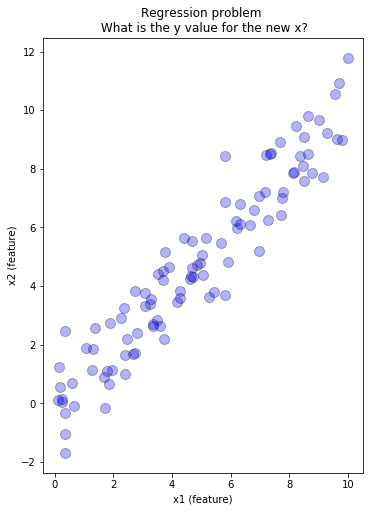

In [39]:
plot_points_regression(X, y)

In [40]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X, y)
x_new = 10 * np.random.rand(10, 1).reshape(-1, 1)
y_pred = knn.predict(x_new)

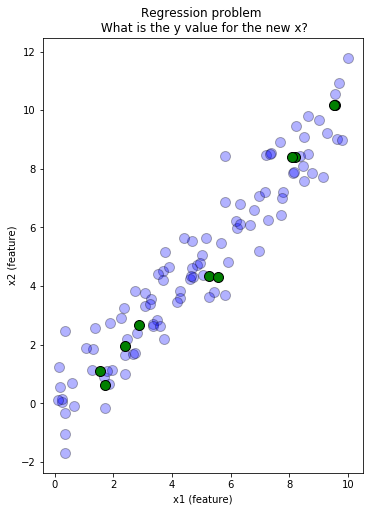

In [41]:
plot_points_regression(X, y, new_points=x_new, new_prediction=y_pred)

In [42]:
x_new = (30 * np.random.rand(100, 1) - 10).reshape(-1, 1)

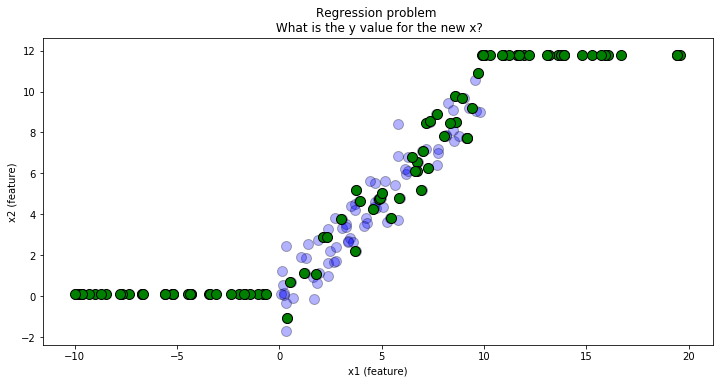

In [43]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(x_new)
plot_points_regression(X, y, new_points=x_new, new_prediction=y_pred)

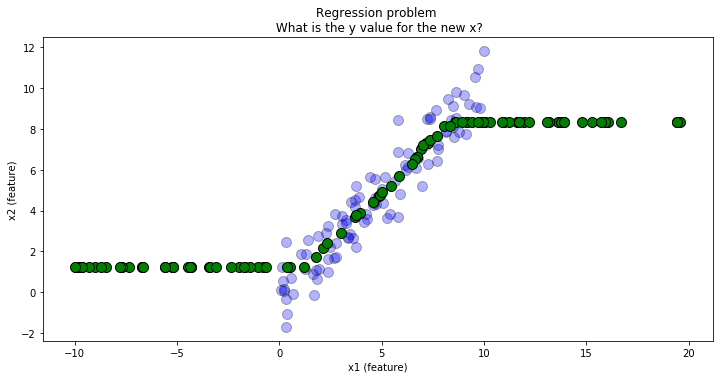

In [44]:
knn = KNeighborsRegressor(n_neighbors=30)
knn.fit(X, y)
y_pred = knn.predict(x_new)
plot_points_regression(X, y, new_points=x_new, new_prediction=y_pred)

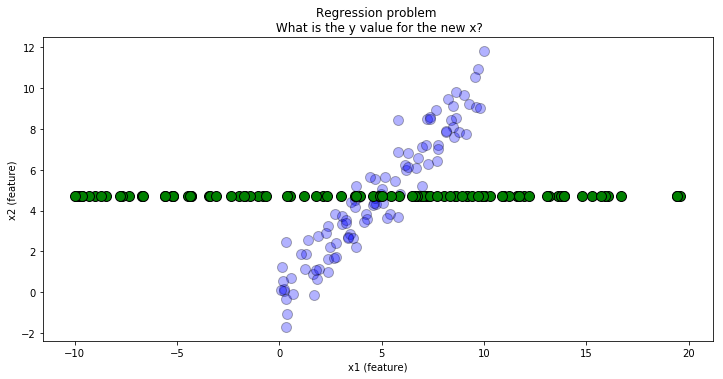

In [45]:
knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X, y)
y_pred = knn.predict(x_new)
plot_points_regression(X, y, new_points=x_new, new_prediction=y_pred)

## Выбор параметров модели

<img src="pics/vtt.png">


Testing set - в самом начале работы сохранить часть данных и не использовать их до внедрения модели в боевое окружение. Дальше работаем с разбиением на 2 части, которые вместо train и validation называем train и test.

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((60, 1), (40, 1), (60, 1), (40, 1))

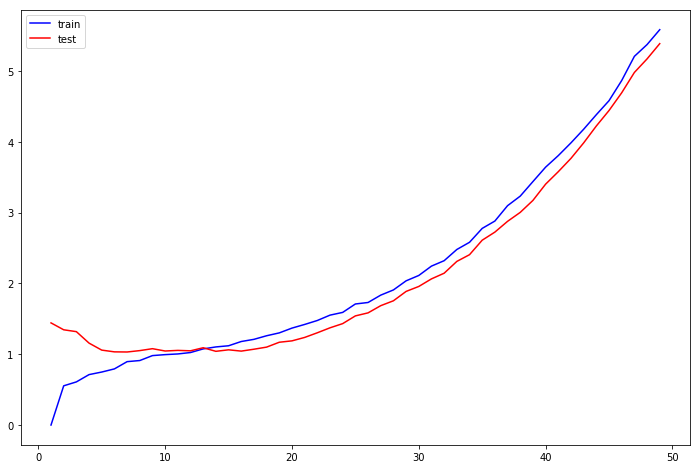

In [48]:
from sklearn.metrics import mean_squared_error
neighbors = range(1, 50)
errors_train = []
errors_test = []
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    errors_train.append(mean_squared_error(knn.predict(X_train), y_train))
    errors_test.append(mean_squared_error(knn.predict(X_test), y_test))
    
plt.plot(neighbors, errors_train, color='blue', label='train')
plt.plot(neighbors, errors_test, color='red', label='test')
plt.legend()

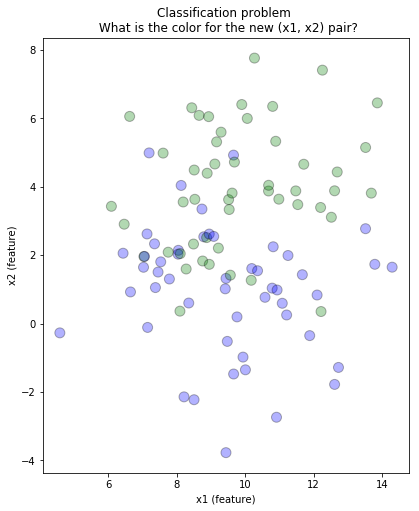

In [49]:
X, y = datasets.make_blobs(n_samples=100, random_state=4, centers=2, cluster_std=2)
X[:5], y[:5]
plot_points(X, y)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 


((60, 2), (40, 2), (60,), (40,))

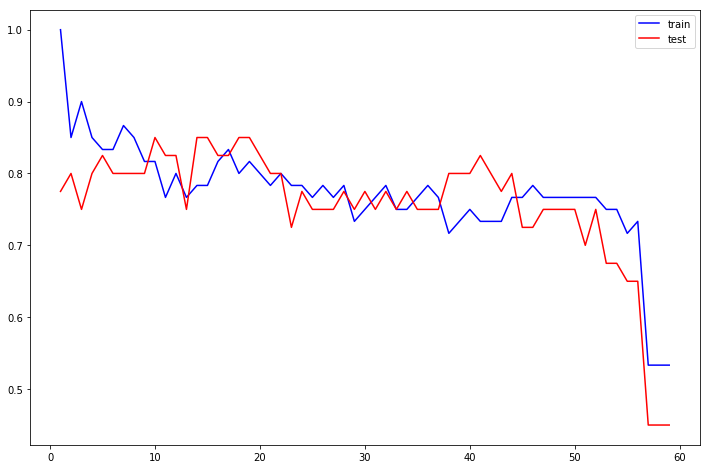

In [51]:
neighbors = range(1, 60)
errors_train = []
errors_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    errors_train.append(accuracy_score(knn.predict(X_train), y_train))
    errors_test.append(accuracy_score(knn.predict(X_test), y_test))
    
plt.plot(neighbors, errors_train, color='blue', label='train')
plt.plot(neighbors, errors_test, color='red', label='test')
plt.legend()

((180, 2), (120, 2), (180,), (120,))

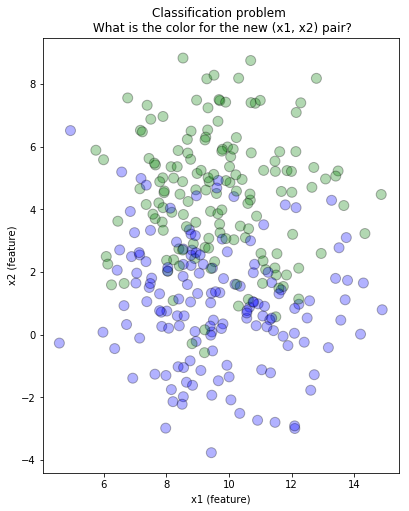

In [52]:
X, y = datasets.make_blobs(n_samples=300, random_state=4, centers=2, cluster_std=2)
X[:5], y[:5]
plot_points(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 


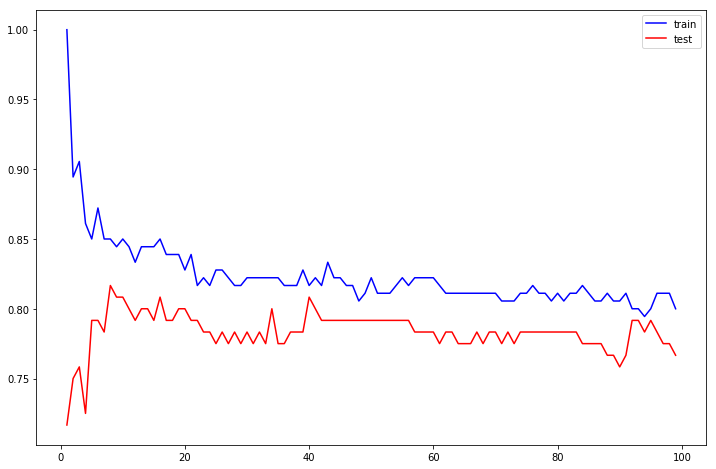

In [53]:
from sklearn.metrics import accuracy_score

neighbors = range(1, 100)
errors_train = []
errors_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    errors_train.append(accuracy_score(knn.predict(X_train), y_train))
    errors_test.append(accuracy_score(knn.predict(X_test), y_test))
    
plt.plot(neighbors, errors_train, color='blue', label='train')
plt.plot(neighbors, errors_test, color='red', label='test')
plt.legend()

## Кросс-валидация

In [54]:
m = 100
np.random.seed(8)
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
X_new = np.linspace(-3, 3, 100).reshape(100, 1)

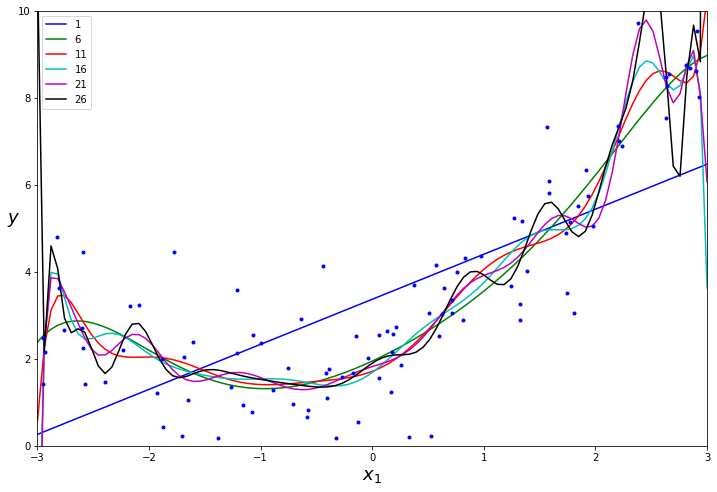

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from itertools import cycle
cycol = iter(cycle('bgrcmk'))

for degree in range(1, 30, 5):
    style = next(cycol)
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree))

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
# plt.savefig('pics/regression_poly_overfit.pdf')
plt.show()

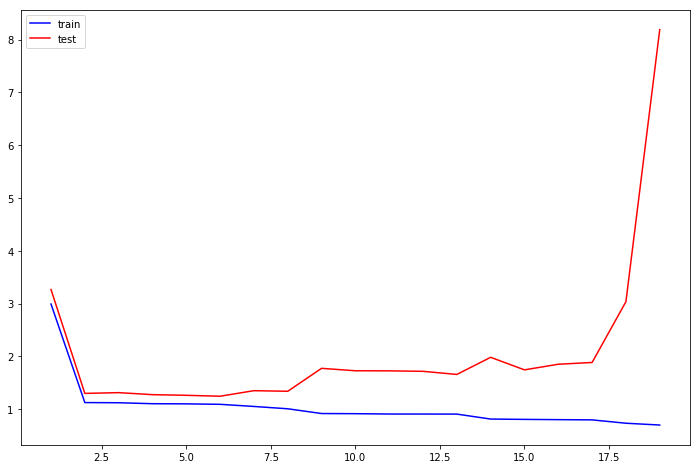

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


errors_train = []
errors_test = []
degree = range(1, 20, 1)
for d in degree:
    
    polybig_features = PolynomialFeatures(degree=d, include_bias=False)
    std_scaler = StandardScaler()
    lr = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lr", lr),
        ])
    polynomial_regression.fit(X_train, y_train)
    errors_train.append(mean_squared_error(polynomial_regression.predict(X_train), y_train))
    errors_test.append(mean_squared_error(polynomial_regression.predict(X_test), y_test))
    
plt.plot(degree, errors_train, color='blue', label='train')
plt.plot(degree, errors_test, color='red', label='test')
plt.legend()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
from sklearn.pipeline import make_pipeline
reg = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(), 
    LinearRegression()
)
reg.fit(X_train, y_train)
mean_squared_error(reg.predict(X_test), y_test)

1.296325834140813

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2)
reg = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(), 
    LinearRegression()
)
reg.fit(X_train, y_train)
mean_squared_error(reg.predict(X_test), y_test)

0.8383217821179298

<img src='pics/cv.png'>

In [60]:
from sklearn.model_selection import cross_val_score
reg = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(), 
    LinearRegression()
)
scores = cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')
print(scores)
print('mean', scores.mean())
print('std', scores.std())

[-1.2517077  -1.51190413 -0.99480168 -1.14270688 -1.32488083]
mean -1.245200244227485
std 0.17362409696017128


In [61]:
from sklearn.linear_model import Ridge
reg = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(), 
    Ridge()
)
scores = cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')
print(scores)
print('mean', scores.mean())
print('std', scores.std())

[-1.25455576 -1.52809085 -0.98394065 -1.14936014 -1.31776963]
mean -1.2467434058735107
std 0.18044995221811527


## GridSearch

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'ridge__alpha': [1e-8, 1e-7, 1e-6, 1e-5, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
]

reg = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(), 
    Ridge()
)

grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'ridge__alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [63]:
grid_search.best_params_

{'ridge__alpha': 1e-08}

In [64]:
grid_search.best_estimator_

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1e-08, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [65]:
grid_search.best_score_

-1.2452002442350536

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'ridge__alpha': [1e-8, 1e-7, 1e-6, 1e-5, 0.0001, 0.001, 0.01, 0.1, 1, 10],
        'polynomialfeatures__degree': [1, 2, 3, 4, 5]
    },
]

reg = make_pipeline(
    PolynomialFeatures(include_bias=False),
    StandardScaler(), 
    Ridge()
)

grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'ridge__alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10], 'polynomialfeatures__degree': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [67]:
grid_search.best_params_

{'polynomialfeatures__degree': 2, 'ridge__alpha': 1e-08}

In [68]:
grid_search.best_score_

-1.2452002442350536

In [69]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
        'ridge__alpha': [1e-8, 1e-7, 1e-6, 1e-5, 0.0001, 0.001, 0.01, 0.1, 1, 10],
        'polynomialfeatures__degree': [1, 2, 3, 4, 5]
    }

reg = make_pipeline(
    PolynomialFeatures(include_bias=False),
    StandardScaler(), 
    Ridge()
)

rand_search = RandomizedSearchCV(reg, param_grid, cv=5, scoring='neg_mean_squared_error')
rand_search.fit(X, y)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'ridge__alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10], 'polynomialfeatures__degree': [1, 2, 3, 4, 5]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [70]:
rand_search.best_estimator_

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1e-08, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [71]:
rand_search.best_score_

-1.2452002442350536

In [72]:
rand_search.best_params_

{'polynomialfeatures__degree': 2, 'ridge__alpha': 1e-08}

Перед запуском в бой - проверить на отложенной выборке, но не менять параметры!